# <b>2 <span style='color:#0386f7de'>|</span> Importing libraries</b>

In [24]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

读取数据

In [25]:
df = pd.read_csv('data.csv')
df.head()

,ID,Type,CISD1,HSBP1,PGD,GSS,GCLM,PEBP1,CS
0,GSM1539119_con,Normal,8.795816,8.706207,10.501995,7.314575,7.269242,8.385940,8.562655
1,GSM1539120_con,Normal,8.699967,9.035012,10.235847,7.127705,7.232673,8.533798,8.610914
2,GSM1539121_con,Normal,8.325783,8.747281,9.971817,7.505986,7.348975,7.968376,8.584417
3,GSM1539122_con,Normal,8.626391,8.784318,10.328776,7.253972,7.247410,7.980878,8.542854
4,GSM1539123_con,Normal,8.650741,9.005201,10.129801,7.270759,7.216582,7.850519,8.743702


数值特征总结

In [26]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
CISD1,716.000000,8.114654,0.275213,7.392273,7.924333,8.090569,8.289950,8.939007
HSBP1,716.000000,8.684740,0.230119,8.110842,8.517403,8.672173,8.849712,9.402732
PGD,716.000000,10.699477,0.361561,9.343742,10.474226,10.727750,10.937387,11.666733
GSS,716.000000,7.381162,0.135075,6.976528,7.286659,7.390116,7.473684,7.742642
GCLM,716.000000,7.318652,0.101375,7.038331,7.249134,7.316342,7.385215,7.677412
PEBP1,716.000000,8.074643,0.264195,7.369664,7.877078,8.051013,8.251567,8.894122
CS,716.000000,8.694701,0.150350,8.280546,8.590312,8.710006,8.798912,9.142969


数据清洗

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      716 non-null    object 
 1   Type    716 non-null    object 
 2   CISD1   716 non-null    float64
 3   HSBP1   716 non-null    float64
 4   PGD     716 non-null    float64
 5   GSS     716 non-null    float64
 6   GCLM    716 non-null    float64
 7   PEBP1   716 non-null    float64
 8   CS      716 non-null    float64
dtypes: float64(7), object(2)
memory usage: 50.5+ KB


In [28]:
df =  df[df.columns].replace({'Tumor':1, 'Normal':0, })

# <b>7<span style='color:#0386f7de'>|</span> Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>7.1 | standardization</b></p>
</div>. 

In [29]:
from sklearn.preprocessing import StandardScaler 
# num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
# Scaler = StandardScaler()
# df[num_cols] = Scaler.fit_transform(df[num_cols])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>7.2  | Encoding</b></p>
</div>. 

In [30]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
# categ = df[['AgeCategory', 'Race', 'GenHealth']]
# encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
# df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df = df.drop(columns = ['ID'], axis = 1)


# <b>8<span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [31]:
#Select Features
features = df.drop(columns =['Type'], axis = 1)

#Select Target 
target = df['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (572, 7)
Shape of testing feature: (144, 7)
Shape of training label: (572,)
Shape of training label: (144,)


# <b>9<span style='color:#0386f7de'>|</span> Modelling</b>

In [32]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>9.1 | Building Model</b></p>
</div>. 

In [33]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_eval0 = evaluate_model(LR, X_train, y_train)

print('Accuracy:', LR_eval0['acc'])
print('Precision:', LR_eval0['prec'])
print('Recall:', LR_eval0['rec'])
print('F1 Score:', LR_eval0['f1'])
print('Cohens Kappa Score:', LR_eval0['kappa'])
print('Area Under Curve:', LR_eval0['auc'])
print('Confusion Matrix:\n', LR_eval0['cm'])


Accuracy: 0.708041958041958
Precision: 0.7168316831683168
Recall: 0.9378238341968912
F1 Score: 0.8125701459034792
Cohens Kappa Score: 0.20258447976492588
Area Under Curve: 0.7090924285475515
Confusion Matrix:
 [[ 43 143]
 [ 24 362]]


d:\Things\Code\Anaconda3\envs\For_CNN\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_eval1 = evaluate_model(LR, X_test, y_test)

print('Accuracy:', LR_eval1['acc'])
print('Precision:', LR_eval1['prec'])
print('Recall:', LR_eval1['rec'])
print('F1 Score:', LR_eval1['f1'])
print('Cohens Kappa Score:', LR_eval1['kappa'])
print('Area Under Curve:', LR_eval1['auc'])
print('Confusion Matrix:\n', LR_eval1['cm'])



Accuracy: 0.6736111111111112
Precision: 0.6746031746031746
Recall: 0.9340659340659341
F1 Score: 0.7834101382488479
Cohens Kappa Score: 0.18614718614718617
Area Under Curve: 0.7169811320754718
Confusion Matrix:
 [[12 41]
 [ 6 85]]


d:\Things\Code\Anaconda3\envs\For_CNN\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <b>10<span style='color:#0386f7de'>|</span> Comparison</b>

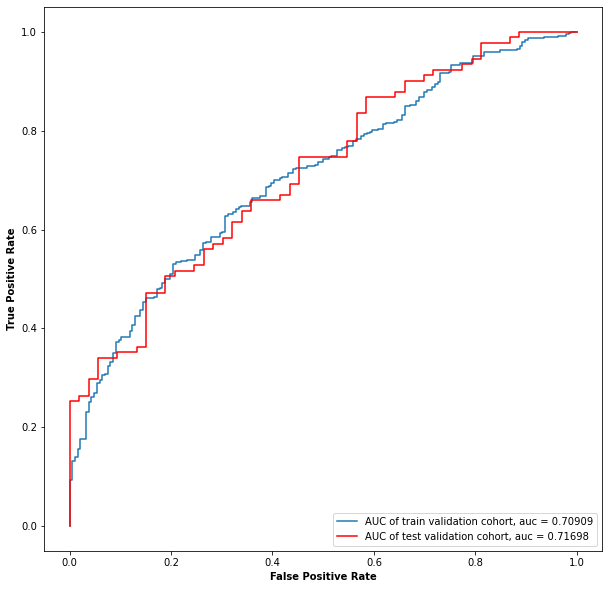

In [35]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')
## Comparing ROC Curve
ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of train validation cohort, auc = {:0.5f}'.format(LR_eval0['auc']))
ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of test validation cohort, auc = {:0.5f}'.format(LR_eval1['auc']),color = 'red')



## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('AUC of train and test validation cohort.png',dpi=600,bbox_inches='tight')